In [286]:
from qiskit import __version__
print(__version__)

1.4.2


In [577]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, state_fidelity, Pauli, DensityMatrix
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile 
import numpy as np
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError, pauli_error 
from qiskit.circuit.library import HGate, UnitaryGate, RZGate, SGate, TGate, PhaseGate
import matplotlib.pyplot as plt

# Encoding Circuit (https://arxiv.org/abs/quant-ph/9602019)

In [508]:
control3_pi = PhaseGate(np.pi).control(3)

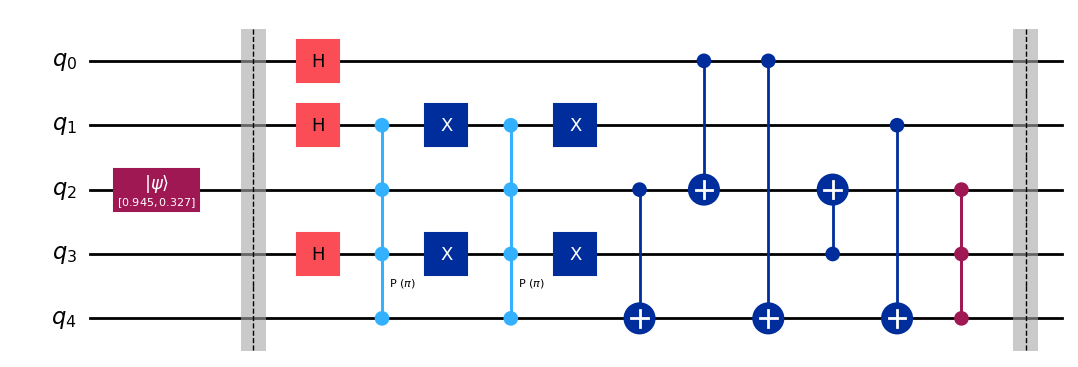

In [509]:
encoding = QuantumCircuit(5)

theta = np.arctan(np.sqrt((np.sqrt(5) - 1) / 2))
amp0 = np.cos(theta/2)
amp1 = np.sin(theta/2)

encoding.initialize([amp0, amp1], 2)
encoding.barrier()
encoding.h(0)
encoding.h(1)
encoding.h(3)

encoding.append(control3_pi, [1, 2, 3, 4])

encoding.x(1)
encoding.x(3)
encoding.append(control3_pi, [1, 2, 3, 4])
encoding.x(1)
encoding.x(3)

encoding.cx(2, 4)
encoding.cx(0, 2)
encoding.cx(0, 4)
encoding.cx(3, 2)

encoding.cx(1, 4)
encoding.ccz(4, 3, 2)
encoding.barrier()

display(encoding.draw(output='mpl'))

In [565]:
state = Statevector.from_instruction(encoding)
display(state.draw("latex"))
print(state)

<IPython.core.display.Latex object>

Statevector([ 0.33411744+0.00000000e+00j,  0.11560942-1.38777878e-17j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.11560942+6.93889390e-18j,  0.33411744-8.32667268e-17j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.11560942-1.38777878e-17j,  0.33411744+1.38777878e-17j,
              0.33411744-1.38777878e-17j,  0.11560942+0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.33411744-8.32667268e-17j,  0.11560942+6.93889390e-18j,
              0.11560942-1.38777878e-17j,  0.33411744+0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.11560942+0.00000000e+00j,  0.33411744-1.38777878e-17j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
      

In [400]:
print(amp0/np.sqrt(8))
print(amp1/np.sqrt(8))

0.33411743610568867
0.11560942388127812


In [511]:
ideal = Statevector([ 0.33411744+0.00000000e+00j,  0.11560942-1.38777878e-17j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.11560942+6.93889390e-18j,  0.33411744-8.32667268e-17j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.11560942-1.38777878e-17j,  0.33411744+1.38777878e-17j,
              0.33411744-1.38777878e-17j,  0.11560942+0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.33411744-8.32667268e-17j,  0.11560942+6.93889390e-18j,
              0.11560942-1.38777878e-17j,  0.33411744+0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.11560942+0.00000000e+00j,  0.33411744-1.38777878e-17j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
             -0.33411744-1.38777878e-17j, -0.11560942+1.38777878e-17j],
            dims=(2, 2, 2, 2, 2))

### Identities (https://arxiv.org/abs/quant-ph/9503016)

Decomposed CCZ

In [582]:
ccz = QuantumCircuit(3, name='Decomposed_CCZ')
rot = SGate().control(1)
rot_inverse = rot.inverse()

ccz.append(rot, [1, 2])
ccz.cx(0, 1)
ccz.append(rot_inverse, [1, 2])
ccz.cx(0, 1)
ccz.append(rot, [0, 2])

custom_ccz = ccz.to_gate()

Decomposed CCCZ

In [583]:
cccz = QuantumCircuit(4, name="Decomposed_CCCZ")
rot2 = TGate().control(1)
rot2_inverse = rot2.inverse()

cccz.append(rot2, [0, 3])
cccz.cx(0, 1)
cccz.append(rot2_inverse, [1, 3])
cccz.cx(0, 1)
cccz.append(rot2, [1, 3])
cccz.cx(1, 2)
cccz.append(rot2_inverse, [2, 3])
cccz.cx(0, 2)
cccz.append(rot2, [2, 3])
cccz.cx(1, 2)
cccz.append(rot2_inverse, [2, 3])
cccz.cx(0, 2)
cccz.append(rot2, [2, 3])

custom_cccz = cccz.to_gate()

### Decomposed Encoding Circuit

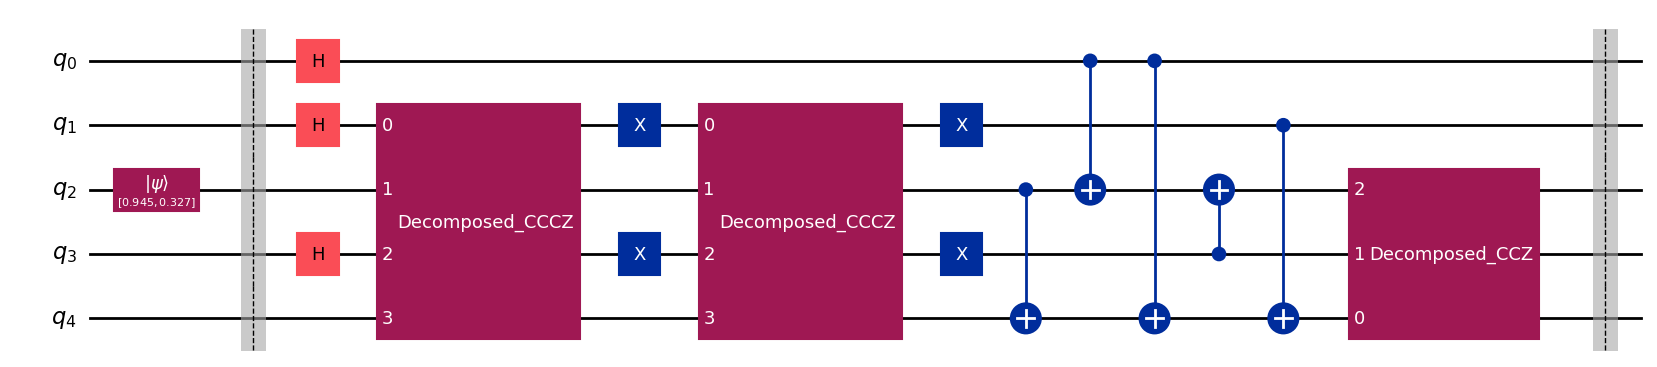

In [584]:
encoding2 = QuantumCircuit(5)

theta = np.arctan(np.sqrt((np.sqrt(5) - 1) / 2))
amp0 = np.cos(theta/2)
amp1 = np.sin(theta/2)

encoding2.initialize([amp0, amp1], 2)
encoding2.barrier()
encoding2.h(0)
encoding2.h(1)
encoding2.h(3)

encoding2.append(custom_cccz, [1, 2, 3, 4])

encoding2.x(1)
encoding2.x(3)
encoding2.append(custom_cccz, [1, 2, 3, 4])
encoding2.x(1)
encoding2.x(3)

encoding2.cx(2, 4)
encoding2.cx(0, 2)
encoding2.cx(0, 4)
encoding2.cx(3, 2)

encoding2.cx(1, 4)
encoding2.append(custom_ccz, [4, 3, 2])
encoding2.barrier()

display(encoding2.draw(output='mpl'))

In [587]:
state2 = Statevector.from_instruction(encoding2)
print(state.equiv(state2))

True


# Fault-Tolerant 5-Qubit QEC Circuit (https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.121.050502)

### Measuring XZZXI:

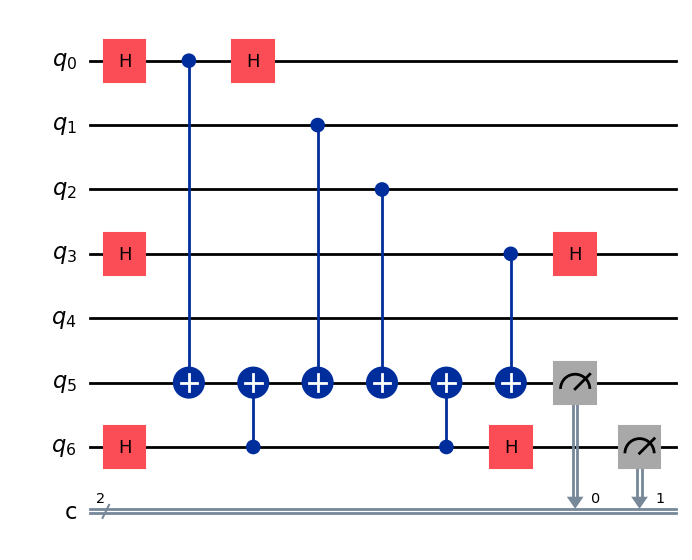

In [405]:
# Last two qubits are syndrome and flag qubits
QEC_circ1 = QuantumCircuit(7,2)

# Last qubit is initialized to be |+>
QEC_circ1.h(6)

QEC_circ1.h(0)
QEC_circ1.cx(0, 5)
QEC_circ1.h(0)

QEC_circ1.cx(6, 5)

QEC_circ1.cx(1, 5)
QEC_circ1.cx(2, 5)

QEC_circ1.cx(6, 5)

QEC_circ1.h(3)
QEC_circ1.cx(3, 5)
QEC_circ1.h(3)

# To measure the last qubit in the X basis
QEC_circ1.h(6)

# Measure
QEC_circ1.measure([5, 6], [0, 1])

display(QEC_circ1.draw(output='mpl'))

### Measuring IXZZX:

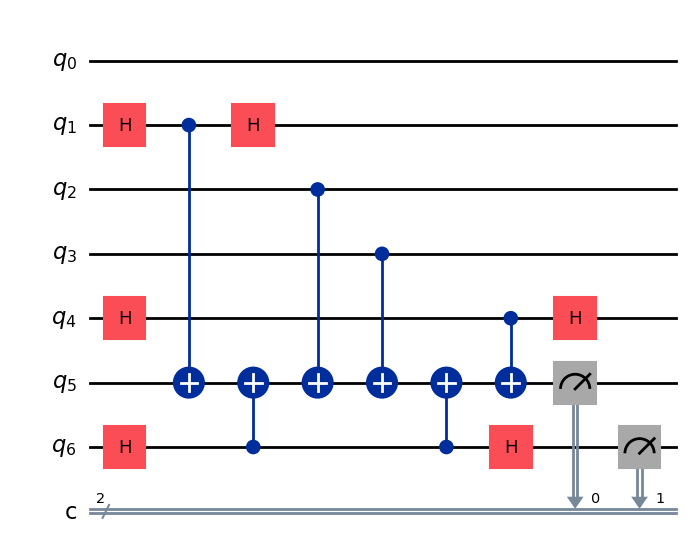

In [404]:
# Last two qubits are syndrome and flag qubits
QEC_circ2 = QuantumCircuit(7,2)

# Last qubit is initialized to be |+>
QEC_circ2.h(6)

QEC_circ2.h(1)
QEC_circ2.cx(1, 5)
QEC_circ2.h(1)

QEC_circ2.cx(6, 5)

QEC_circ2.cx(2, 5)
QEC_circ2.cx(3, 5)

QEC_circ2.cx(6, 5)

QEC_circ2.h(4)
QEC_circ2.cx(4, 5)
QEC_circ2.h(4)

# To measure the last qubit in the X basis
QEC_circ2.h(6)

# Measure
QEC_circ2.measure([5, 6], [0, 1])

display(QEC_circ2.draw(output='mpl'))

### Measuring XIXZZ:

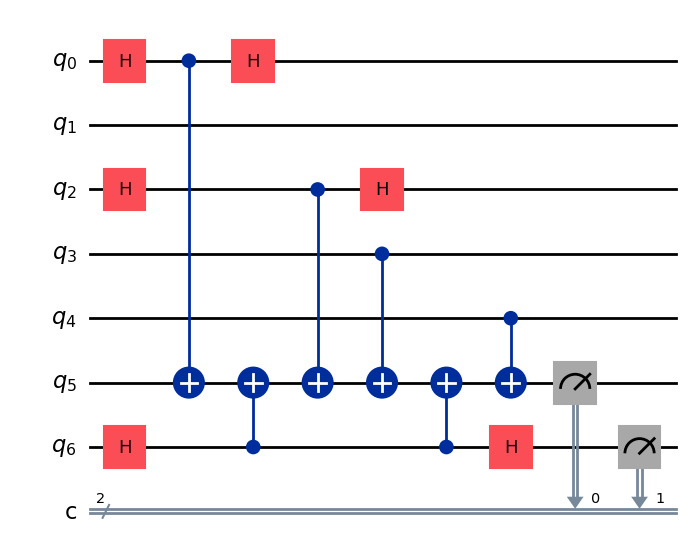

In [412]:
# Last two qubits are syndrome and flag qubits
QEC_circ3 = QuantumCircuit(7,2)

# Last qubit is initialized to be |+>
QEC_circ3.h(6)

QEC_circ3.h(0)
QEC_circ3.cx(0, 5)
QEC_circ3.h(0)

QEC_circ3.cx(6, 5)

QEC_circ3.h(2)
QEC_circ3.cx(2, 5)
QEC_circ3.h(2)

QEC_circ3.cx(3, 5)

QEC_circ3.cx(6, 5)

QEC_circ3.cx(4, 5)

# To measure the last qubit in the X basis
QEC_circ3.h(6)

# Measure
QEC_circ3.measure([5, 6], [0, 1])

display(QEC_circ3.draw(output='mpl'))

### Measuring ZXIXZ:

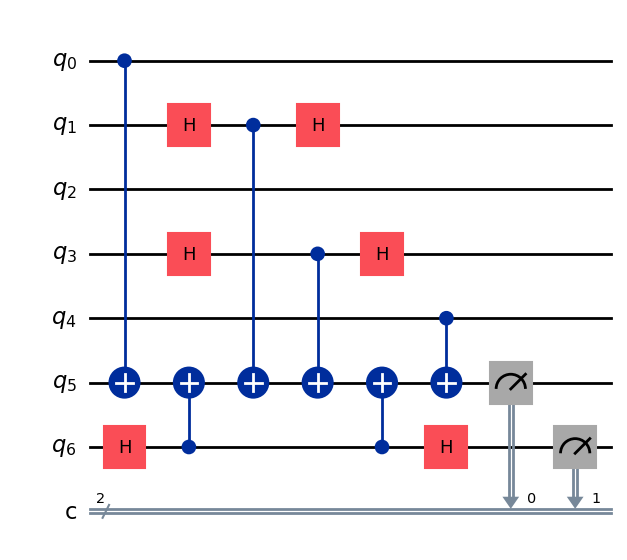

In [413]:
# Last two qubits are syndrome and flag qubits
QEC_circ4 = QuantumCircuit(7,2)

# Last qubit is initialized to be |+>
QEC_circ4.h(6)

QEC_circ4.cx(0, 5)

QEC_circ4.cx(6, 5)

QEC_circ4.h(1)
QEC_circ4.cx(1, 5)
QEC_circ4.h(1)

QEC_circ4.h(3)
QEC_circ4.cx(3, 5)
QEC_circ4.h(3)

QEC_circ4.cx(6, 5)

QEC_circ4.cx(4, 5)

# To measure the last qubit in the X basis
QEC_circ4.h(6)

# Measure
QEC_circ4.measure([5, 6], [0, 1])

display(QEC_circ4.draw(output='mpl'))

### 4 Measurements together, reset ancilla qubits after each measurement 

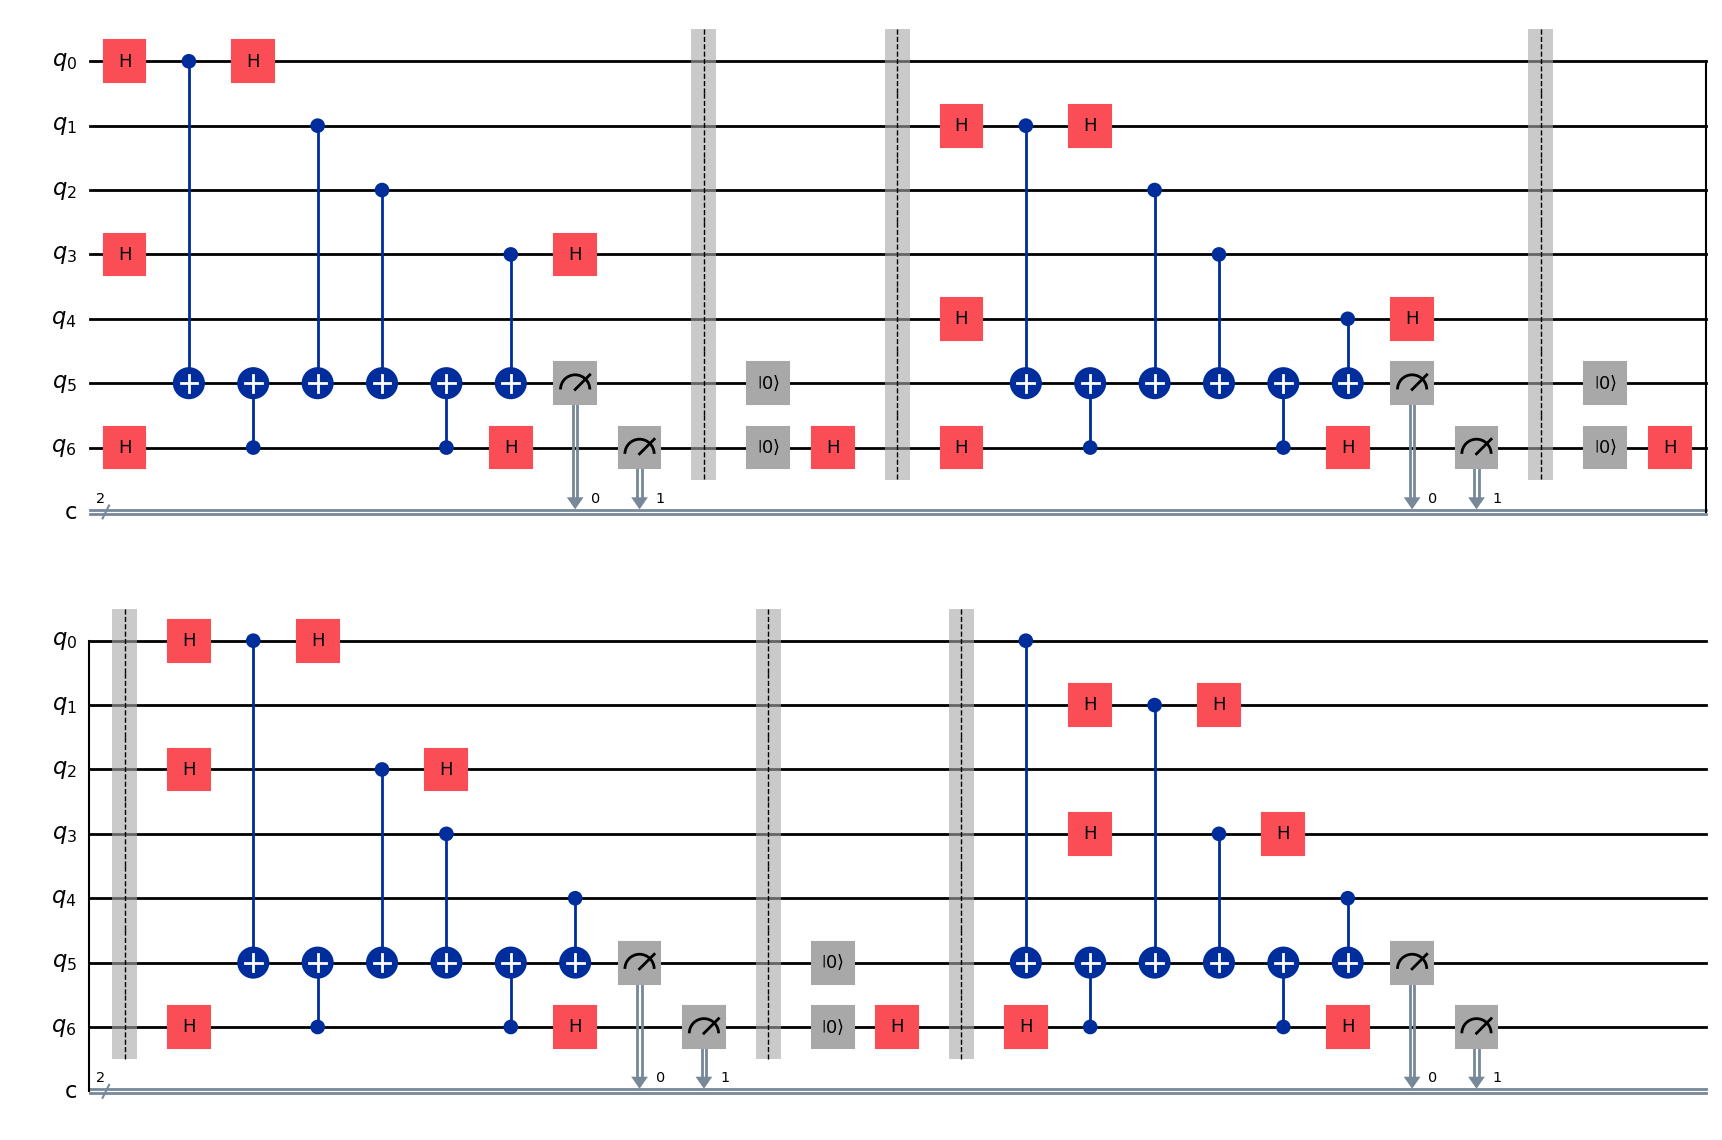

In [414]:
QEC_4m = QuantumCircuit(7, 2)

# Copy first Measurement
QEC_4m.compose(QEC_circ1, inplace=True)
QEC_4m.barrier()

# Resetting both ancilla qubits
QEC_4m.reset(5)
QEC_4m.reset(6)
QEC_4m.h(6)
QEC_4m.barrier()

# Copy second Measurement
QEC_4m.compose(QEC_circ2, inplace=True)
QEC_4m.barrier()

# Resetting both ancilla qubits
QEC_4m.reset(5)
QEC_4m.reset(6)
QEC_4m.h(6)
QEC_4m.barrier()

# Copy third Measurement
QEC_4m.compose(QEC_circ3, inplace=True)
QEC_4m.barrier()

# Resetting both ancilla qubits
QEC_4m.reset(5)
QEC_4m.reset(6)
QEC_4m.h(6)
QEC_4m.barrier()

# Copy fourth Measurement
QEC_4m.compose(QEC_circ4, inplace=True)


display(QEC_4m.draw(output='mpl'))

# Implementing Logical Hadamard

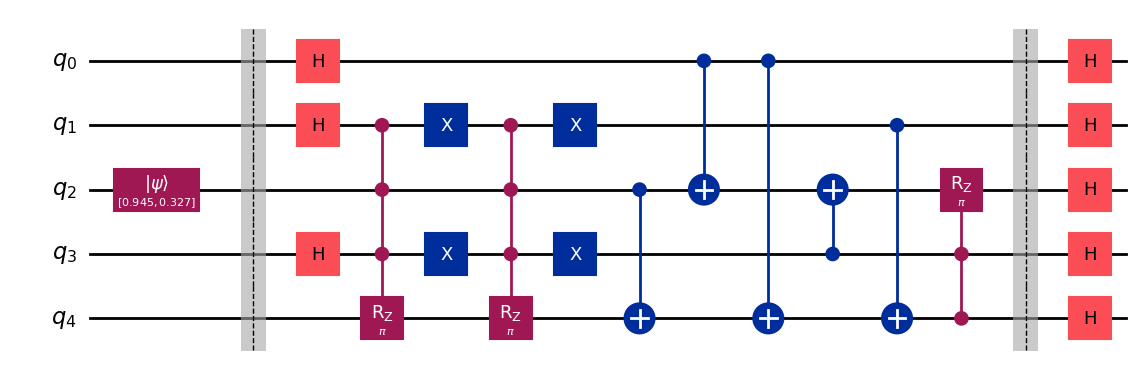

In [402]:
circ_copy = encoding.copy()
for i in range(5):
    circ_copy.h(i)

display(circ_copy.draw(output='mpl'))

### Need to relabel qubit lines

# Implementing Logical CZ

### First Piece:

In [386]:
Kmat = SGate().to_matrix() @ HGate().to_matrix()
K = UnitaryGate(Kmat, label='K')

Kdag_mat = HGate().inverse().to_matrix() @ SGate().inverse().to_matrix()
K_dag = UnitaryGate(Kdag_mat, label='K_dag')

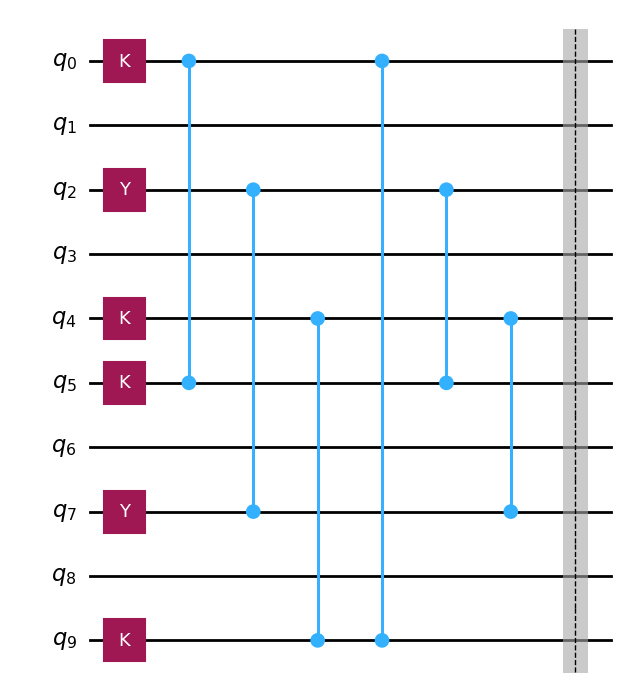

In [382]:
CZ1 = QuantumCircuit(10)

CZ1.append(K, [0])
CZ1.append(K, [4])
CZ1.append(K, [5])
CZ1.append(K, [9])
CZ1.y(2)
CZ1.y(7)

CZ1.cz(0, 5)
CZ1.cz(2, 7)
CZ1.cz(4, 9)
CZ1.cz(0, 9)
CZ1.cz(2, 5)
CZ1.cz(4, 7)
CZ1.barrier()

display(CZ1.draw(output='mpl'))

### Second Piece: A block of EC

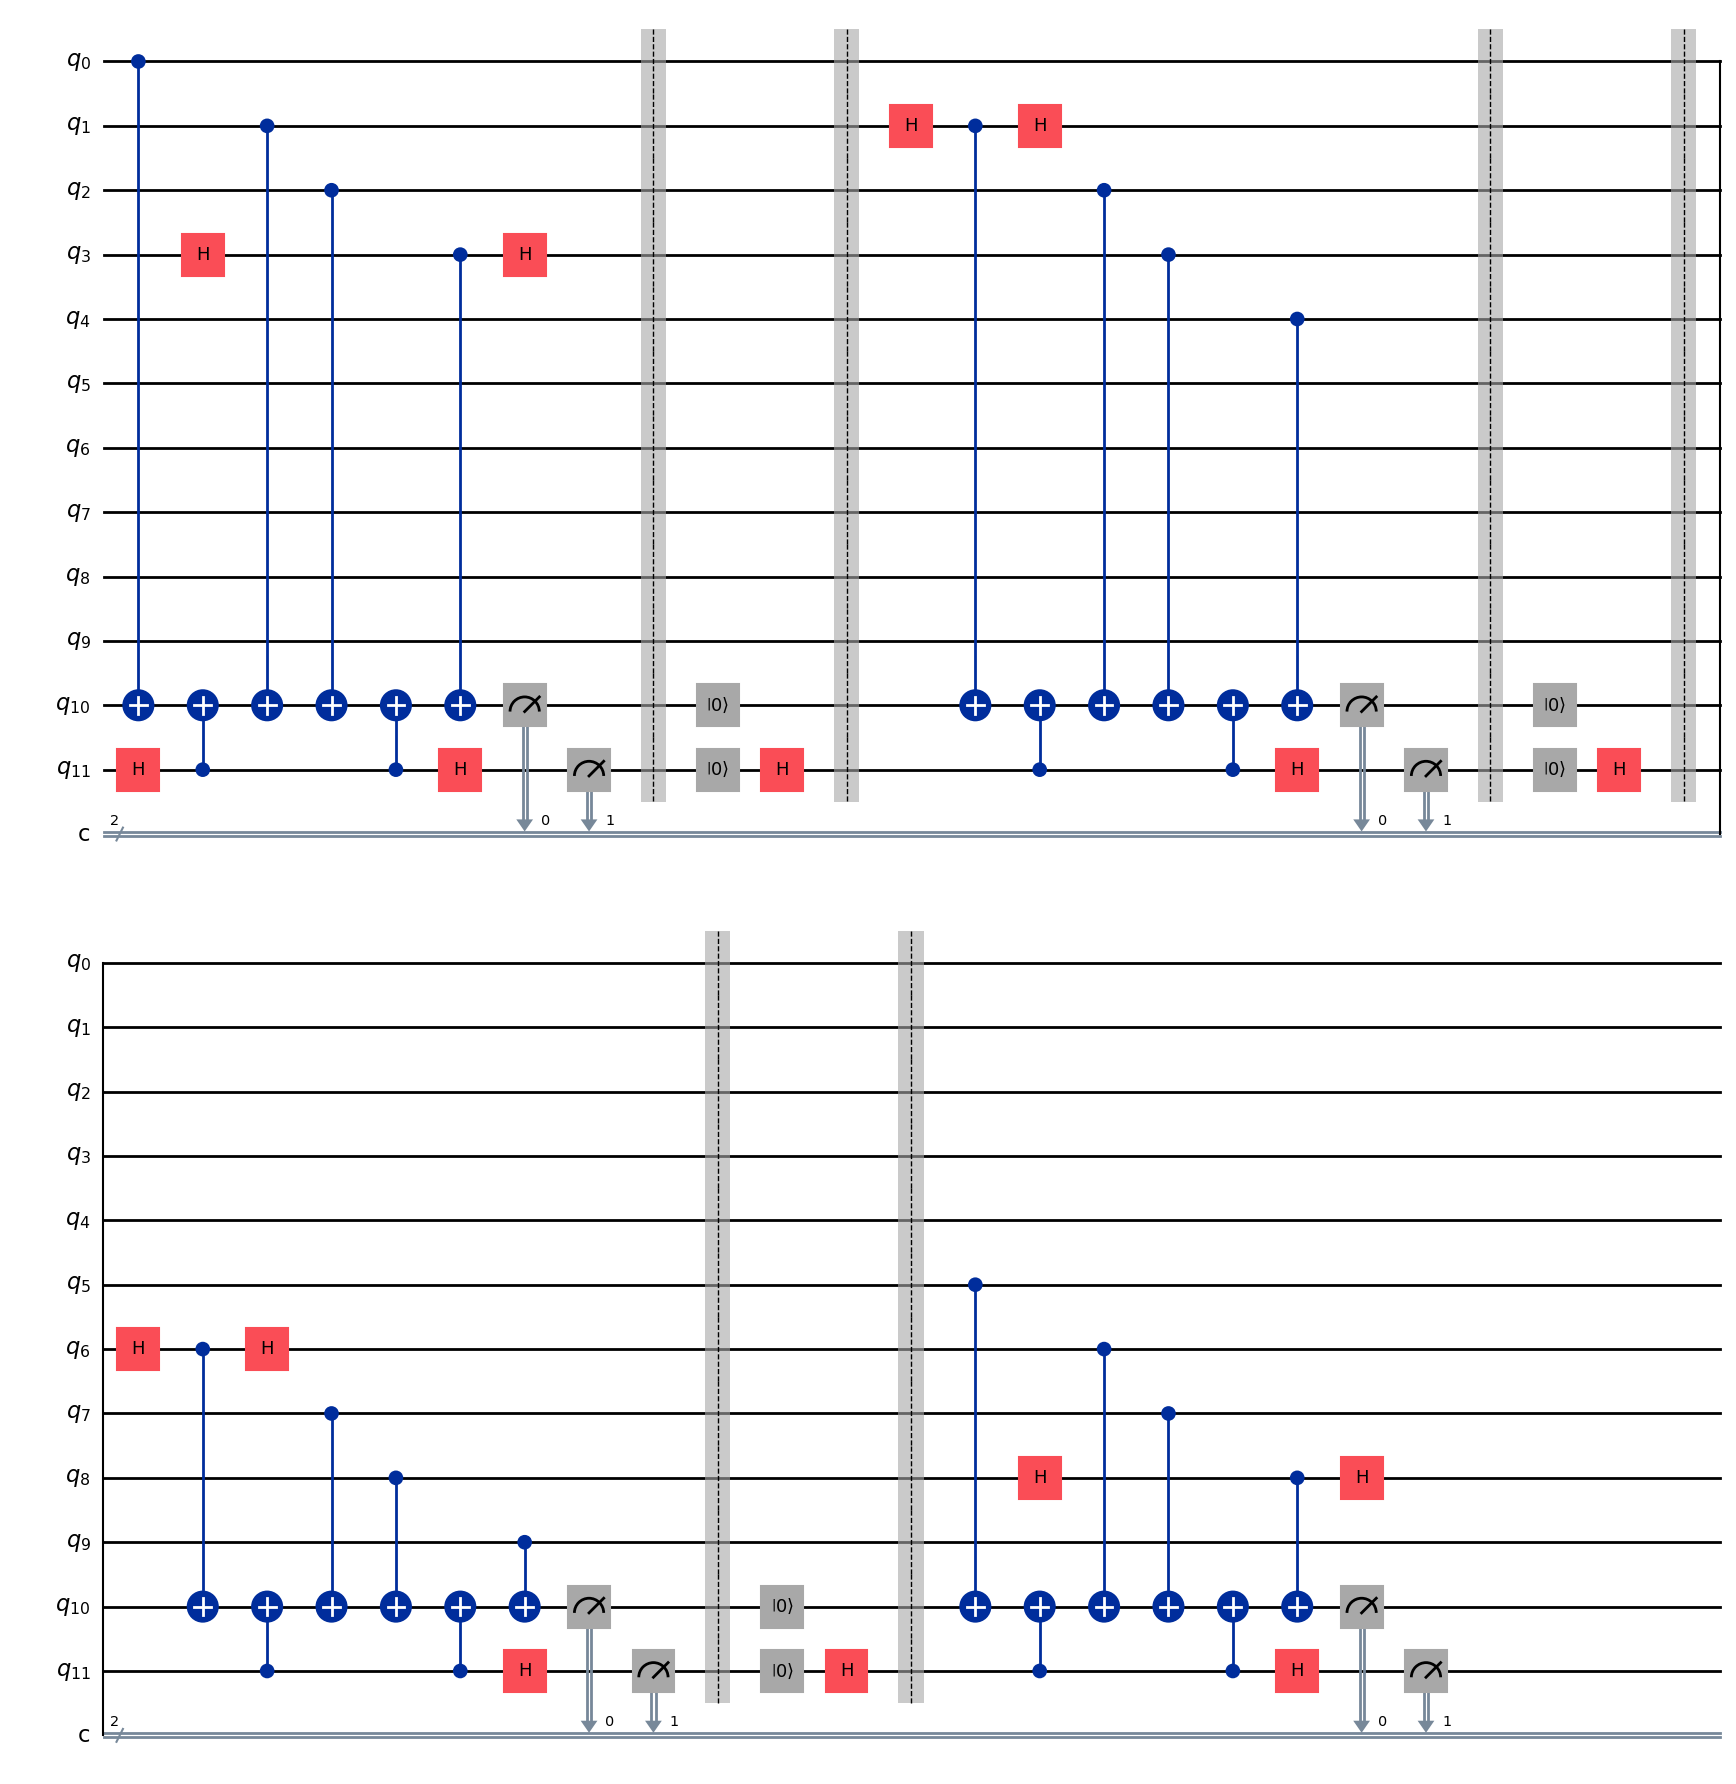

In [417]:
middle_EC = QuantumCircuit(12, 2)
middle_EC.h(11)

# Measuring -ZZZXI IIIII
middle_EC.cx(0, 10)

middle_EC.cx(11, 10)

middle_EC.cx(1, 10)
middle_EC.cx(2, 10)

middle_EC.cx(11, 10)

middle_EC.h(3)
middle_EC.cx(3, 10)
middle_EC.h(3)

middle_EC.h(11)
middle_EC.measure([10, 11], [0, 1])

middle_EC.barrier()
middle_EC.reset(10)
middle_EC.reset(11)
middle_EC.h(11)
middle_EC.barrier()

# Measuring -IXZZZ IIIII
middle_EC.h(1)
middle_EC.cx(1, 10)
middle_EC.h(1)

middle_EC.cx(11, 10)

middle_EC.cx(2, 10)
middle_EC.cx(3, 10)

middle_EC.cx(11, 10)

middle_EC.cx(4, 10)

middle_EC.h(11)
middle_EC.measure([10, 11], [0, 1])
middle_EC.barrier()

middle_EC.reset(10)
middle_EC.reset(11)
middle_EC.h(11)
middle_EC.barrier()

# Measuring -IIIII IXZZZ
middle_EC.h(6)
middle_EC.cx(6, 10)
middle_EC.h(6)

middle_EC.cx(11, 10)

middle_EC.cx(7, 10)
middle_EC.cx(8, 10)

middle_EC.cx(11, 10)

middle_EC.cx(9, 10)

middle_EC.h(11)
middle_EC.measure([10, 11], [0, 1])
middle_EC.barrier()

middle_EC.reset(10)
middle_EC.reset(11)
middle_EC.h(11)
middle_EC.barrier()

# Measuring -IIIII ZZZXI
middle_EC.cx(5, 10)
middle_EC.cx(11, 10)
middle_EC.cx(6, 10)
middle_EC.cx(7, 10)
middle_EC.cx(11, 10)
middle_EC.h(8)
middle_EC.cx(8, 10)
middle_EC.h(8)

middle_EC.h(11)
middle_EC.measure([10, 11], [0, 1])

display(middle_EC.draw(output='mpl'))


### Third Piece: 

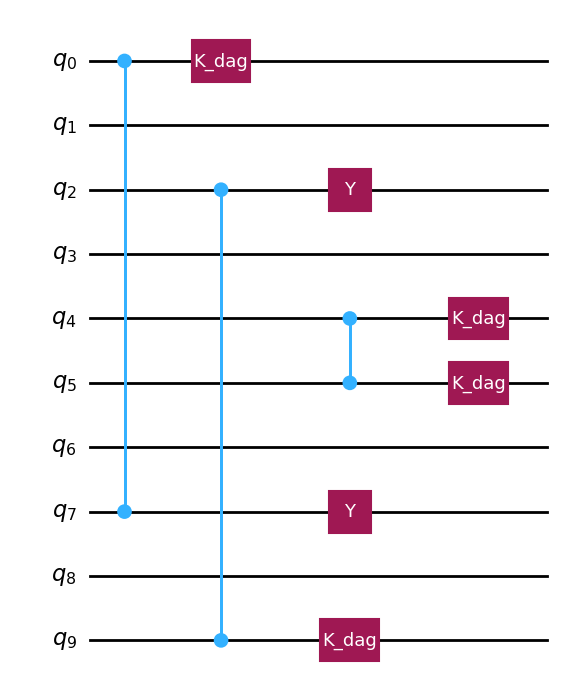

In [387]:
CZ2 = QuantumCircuit(10)

CZ2.cz(0, 7)
CZ2.cz(2, 9)
CZ2.cz(4, 5)

CZ2.append(K_dag, [0])
CZ2.append(K_dag, [4])
CZ2.append(K_dag, [5])
CZ2.append(K_dag, [9])
CZ2.y(2)
CZ2.y(7)

display(CZ2.draw(output='mpl'))